In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

outdir = "/groups/icecube/peter/workspace/analyses/Multiclassification_track_cascade_neutrinos/Peter_Thesis_Hand_Over/Plots/Monte_Carlo_results_against_retro/"

In [3]:
# indir_db_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
# with sql.connect(indir_db_MC) as con:
#         query = f"""
#         SELECT
#             event_no, interaction_type, pid
#         FROM 
#             truth
#         """
#         MC_interaction_type = read_sql(query,con)

#outdir_interaction_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
#MC_interaction_type = pd.read_csv(outdir_interaction_type + 'interaction_type_New_muon_test.csv')

In [4]:
#indir_multiclass_old = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/dynedge_pid_classification3_test/results.csv"
indir_multiclass = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
#indir_track_cascade = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_retro = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Retro/retro_on_new_muon_test_set.csv"
indir_position = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"

indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"

In [5]:
#multiclass_old = pd.read_csv(indir_multiclass_old).sort_values('event_no').reset_index(drop = True)
multiclass = pd.read_csv(indir_multiclass).reset_index(drop = True)
#track_cascade = pd.read_csv(indir_track_cascade).reset_index(drop = True)
energy = pd.read_csv(indir_energy).reset_index(drop = True)
zenith = pd.read_csv(indir_zenith).reset_index(drop = True)
azimuth = pd.read_csv(indir_azimuth).reset_index(drop = True)
retro = pd.read_csv(indir_retro).reset_index(drop = True)
position = pd.read_csv(indir_position).reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).reset_index(drop = True)

In [6]:
neutrino_event_nos = multiclass['event_no'][multiclass['pid'].isin((-12,12,-14,14,-16,16)).to_list()]
energy = energy[energy['event_no'].isin(neutrino_event_nos)]
zenith = zenith[zenith['event_no'].isin(neutrino_event_nos)]
azimuth = azimuth[azimuth['event_no'].isin(neutrino_event_nos)]
position = position[position['event_no'].isin(neutrino_event_nos)]

In [7]:
print(len(position))
print(len(energy))
print(len(zenith))
print(len(azimuth))
print(len(retro))
energy = energy[energy['event_no'].isin(retro['event_no'].to_list())]
zenith = zenith[zenith['event_no'].isin(retro['event_no'].to_list())]
azimuth = azimuth[azimuth['event_no'].isin(retro['event_no'].to_list())]
position = position[position['event_no'].isin(retro['event_no'].to_list())]
retro = retro[retro['event_no'].isin(energy['event_no'].to_list())]
print(len(position))
print(len(energy))
print(len(zenith))
print(len(azimuth))
print(len(retro))

36744942
36744942
36744942
36744942
8131391


In [ ]:
energy.sort_values(by='event_no',inplace=True)
zenith.sort_values(by='event_no',inplace=True)
azimuth.sort_values(by='event_no',inplace=True)
position.sort_values(by='event_no',inplace=True)
retro.sort_values(by='event_no',inplace=True)

energy.reset_index(drop = True,inplace=True)
zenith.reset_index(drop = True,inplace=True)
azimuth.reset_index(drop = True,inplace=True)
position.reset_index(drop = True,inplace=True)
retro.reset_index(drop = True,inplace=True)

In [ ]:
print(position.columns)
print(position.head(10))

Index(['Unnamed: 0', 'position_x_pred', 'position_y_pred', 'position_z_pred',
       'position_x', 'position_y', 'position_z', 'event_no'],
      dtype='object')
   Unnamed: 0  position_x_pred  position_y_pred  position_z_pred  position_x  \
0     8488513       114.610626       -59.615387      -236.479019  114.974747   
1     3514308        41.116871        43.547611      -347.292267   33.731045   
2    28688165        40.802429        33.199127      -298.865997   56.899178   
3     1339130       123.604759       -58.971630      -294.380707  104.798332   
4    24564732        47.366650      -106.494179      -334.403809   68.357132   
5    10404352       -18.428907       -78.521400      -464.553497  -13.058158   
6     3810495       -12.575223         5.995712      -385.642700  -12.713958   
7    27928748        73.240250       -68.867889      -403.313019   79.111549   
8     2255523       107.528435        32.309669      -362.034668  108.176376   
9     8820166        41.760395        

In [ ]:
zenith_residual = zenith['zenith_pred'] - zenith['zenith']
azimuth_residual = azimuth['azimuth_pred'] - azimuth['azimuth']
azimuth_residual[azimuth_residual>np.pi] = azimuth_residual[azimuth_residual>np.pi] - np.pi
azimuth_residual[azimuth_residual<-np.pi] = azimuth_residual[azimuth_residual<-np.pi] + np.pi
energy_residual = np.log10(energy['energy_pred']) - np.log10(energy['energy'])
position_x_residual = position['position_x_pred'] - position['position_x']
position_y_residual = position['position_y_pred'] - position['position_y']
position_z_residual = position['position_z_pred'] - position['position_z']

zenith['residual'] = zenith_residual
azimuth['residual'] = azimuth_residual
energy['residual'] = energy_residual
position['position_x_residual'] = position_x_residual
position['position_y_residual'] = position_y_residual
position['position_z_residual'] = position_z_residual

zenith_residual_retro = retro['zenith_retro'] - zenith['zenith']
azimuth_residual_retro = retro['azimuth_retro'] - azimuth['azimuth']
azimuth_residual_retro[azimuth_residual_retro>np.pi] = azimuth_residual_retro[azimuth_residual_retro>np.pi] - np.pi
azimuth_residual_retro[azimuth_residual_retro<-np.pi] = azimuth_residual_retro[azimuth_residual_retro<-np.pi] + np.pi
energy_residual_retro = np.log10(retro['energy_retro']) - np.log10(energy['energy'])

position_x_residual_retro = retro['position_x_retro'] - position['position_x']
position_y_residual_retro = retro['position_y_retro'] - position['position_y']
position_z_residual_retro = retro['position_z_retro'] - position['position_z']

retro['zenith_retro_residual'] = zenith_residual_retro
retro['azimuth_retro_residual'] = azimuth_residual_retro
retro['energy_retro_residual'] = energy_residual_retro
retro['position_x_retro_residual'] = position_x_residual_retro
retro['position_y_retro_residual'] = position_y_residual_retro
retro['position_z_retro_residual'] = position_z_residual_retro


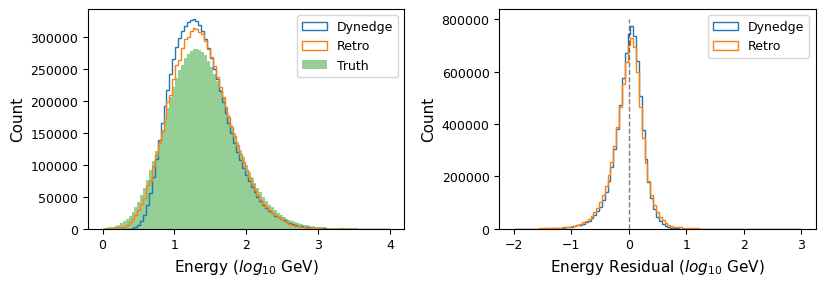

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_energy = np.linspace(0,4,100)
hist = axs[0].hist(np.log10(energy['energy_pred']),bins=bins_energy,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(np.log10(retro['energy_retro']),bins=bins_energy,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(np.log10(energy['energy']),bins=bins_energy,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

bins_energy_res = np.linspace(-2,3,102)
axs[1].hist(energy['residual'],bins=bins_energy_res,label='Dynedge',histtype='step')
axs[1].hist(retro['energy_retro_residual'],bins=bins_energy_res,label='Retro',histtype='step')
axs[1].vlines(0,0,800000,linestyle='--',color='k',alpha=0.5,linewidth=1)
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Energy Residual ($log_{10}$ GeV)')
#axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'energy_result_MC_vs_retro.png', format='png', bbox_inches='tight')

In [ ]:
print(np.log10(1000-500))
print(np.log10(1000)-np.log10(500))

2.6989700043360187
0.30102999566398125


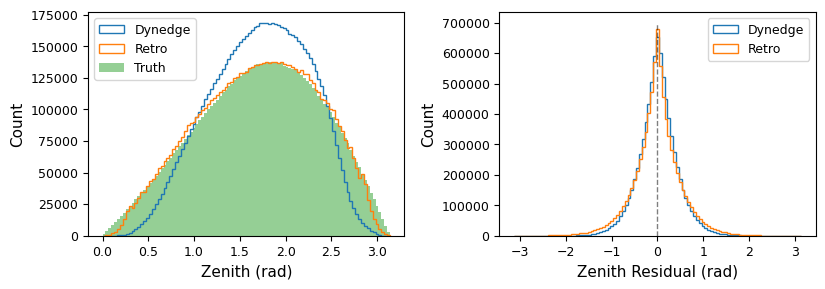

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_zenith = np.linspace(0,np.pi,100)
hist = axs[0].hist(zenith['zenith_pred'],bins=bins_zenith,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(retro['zenith_retro'],bins=bins_zenith,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(zenith['zenith'],bins=bins_zenith,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Zenith (rad)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend(loc='upper left')

bins_zenith_res = np.linspace(-np.pi,np.pi,102)
axs[1].hist(zenith['residual'],bins=bins_zenith_res,label='Dynedge',histtype='step')
axs[1].hist(retro['zenith_retro_residual'],bins=bins_zenith_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Zenith Residual (rad)')
axs[1].vlines(0,0,700000,linestyle='--',color='k',alpha=0.5,linewidth=1)
#axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'zenith_result_MC_vs_retro.png', format='png', bbox_inches='tight')

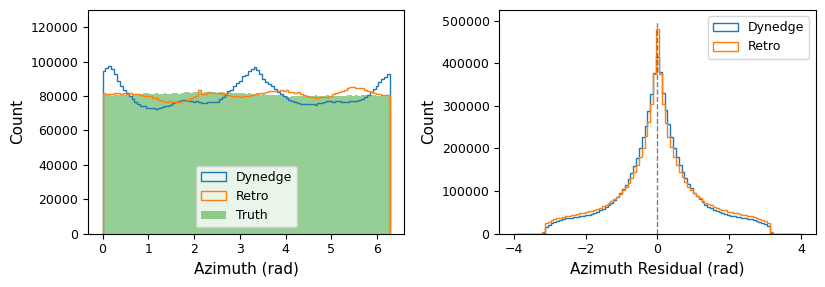

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_azimuth = np.linspace(0,2*np.pi,100)
hist = axs[0].hist(azimuth['azimuth_pred'],bins=bins_azimuth,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(retro['azimuth_retro'],bins=bins_azimuth,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(azimuth['azimuth'],bins=bins_azimuth,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Azimuth (rad)')
#axs[0].set_yscale('log')
axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_azimuth_res = np.linspace(-4,4,102)
axs[1].hist(np.clip(azimuth['residual'],-4,4),bins=bins_azimuth_res,label='Dynedge',histtype='step')
axs[1].hist(np.clip(retro['azimuth_retro_residual'],-4,4),bins=bins_azimuth_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Azimuth Residual (rad)')
axs[1].vlines(0,0,500000,linestyle='--',color='k',alpha=0.5,linewidth=1)
#axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'azimuth_result_MC_vs_retro.png', format='png', bbox_inches='tight')


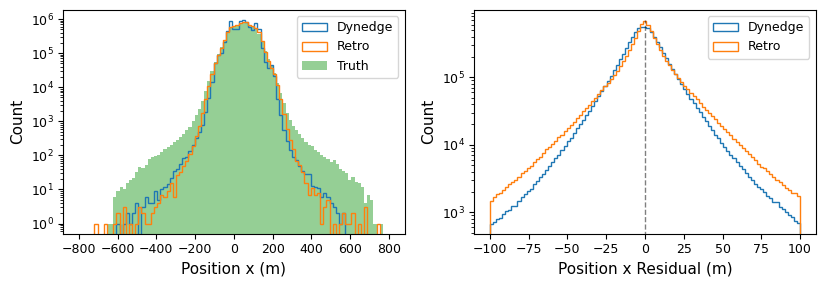

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-800,800,100)
hist = axs[0].hist(position['position_x_pred'],bins=bins_position,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(retro['position_x_retro'],bins=bins_position,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(position['position_x'],bins=bins_position,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position x (m)')
axs[0].set_yscale('log')
#axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_position_res = np.linspace(-100,100,102)
axs[1].hist(position['position_x_residual'],bins=bins_position_res,label='Dynedge',histtype='step')
axs[1].hist(retro['position_x_retro_residual'],bins=bins_position_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Position x Residual (m)')
axs[1].vlines(0,0,700000,linestyle='--',color='k',alpha=0.5,linewidth=1)
axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'position_x_result_MC_vs_retro.png', format='png', bbox_inches='tight')

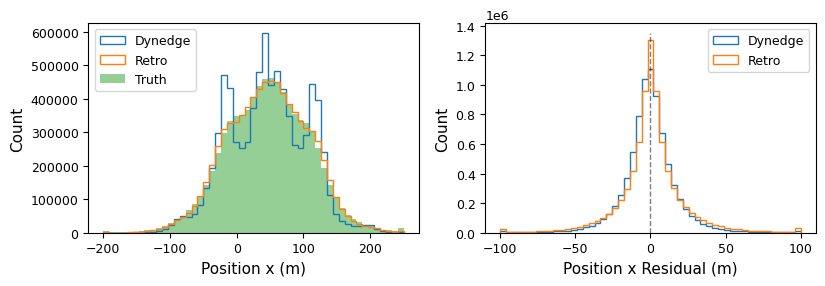

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-200,250,52)
hist = axs[0].hist(np.clip(position['position_x_pred'],-200,250),bins=bins_position,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(retro['position_x_retro'],-200,250),bins=bins_position,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(position['position_x'],-200,250),bins=bins_position,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position x (m)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_position_res = np.linspace(-100,100,52)
axs[1].hist(np.clip(position['position_x_residual'],-100,100),bins=bins_position_res,label='Dynedge',histtype='step')
axs[1].hist(np.clip(retro['position_x_retro_residual'],-100,100),bins=bins_position_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Position x Residual (m)')
axs[1].vlines(0,0,1350000,linestyle='--',color='k',alpha=0.5,linewidth=1)
#axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'position_x_result_MC_vs_retro_not_log.png', format='png', bbox_inches='tight')

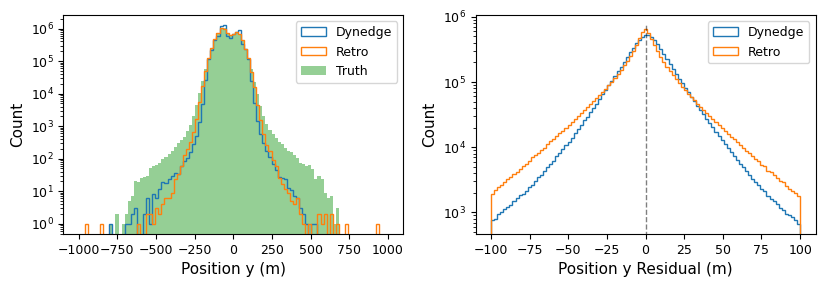

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-1000,1000,102)
hist = axs[0].hist(position['position_y_pred'],bins=bins_position,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(retro['position_y_retro'],bins=bins_position,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(position['position_y'],bins=bins_position,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position y (m)')
axs[0].set_yscale('log')
#axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_position_res = np.linspace(-100,100,102)
axs[1].hist(position['position_y_residual'],bins=bins_position_res,label='Dynedge',histtype='step')
axs[1].hist(retro['position_y_retro_residual'],bins=bins_position_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Position y Residual (m)')
axs[1].vlines(0,0,750000,linestyle='--',color='k',alpha=0.5,linewidth=1)
axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'position_y_result_MC_vs_retro.png', format='png', bbox_inches='tight')

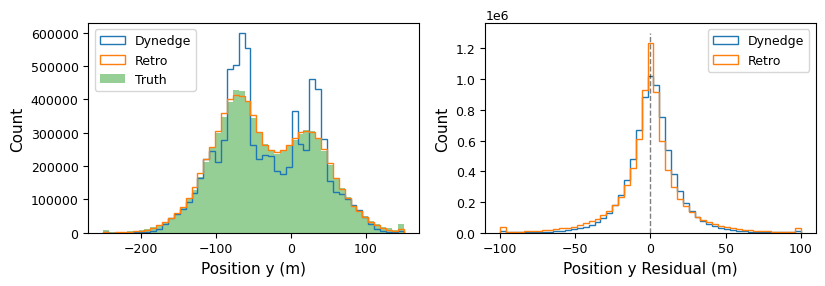

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-250,150,52)
hist = axs[0].hist(np.clip(position['position_y_pred'],-250,150),bins=bins_position,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(retro['position_y_retro'],-250,150),bins=bins_position,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(position['position_y'],-250,150),bins=bins_position,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position y (m)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_position_res = np.linspace(-100,100,52)
axs[1].hist(np.clip(position['position_y_residual'],-100,100),bins=bins_position_res,label='Dynedge',histtype='step')
axs[1].hist(np.clip(retro['position_y_retro_residual'],-100,100),bins=bins_position_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Position y Residual (m)')
axs[1].vlines(0,0,1300000,linestyle='--',color='k',alpha=0.5,linewidth=1)
#axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'position_y_result_MC_vs_retro_not_log.png', format='png', bbox_inches='tight')

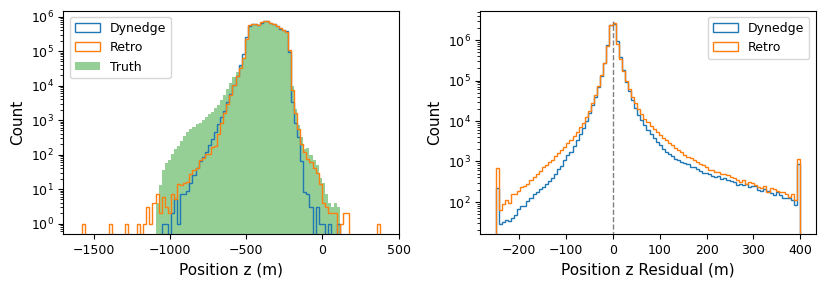

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-1600,400,100)
hist = axs[0].hist(position['position_z_pred'],bins=bins_position,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(retro['position_z_retro'],bins=bins_position,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(position['position_z'],bins=bins_position,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position z (m)')
axs[0].set_yscale('log')
#axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_position_res = np.linspace(-250,400,100)
axs[1].hist(np.clip(position['position_z_residual'],-250,400),bins=bins_position_res,label='Dynedge',histtype='step')
axs[1].hist(np.clip(retro['position_z_retro_residual'],-250,400),bins=bins_position_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Position z Residual (m)')
axs[1].vlines(0,0,3000000,linestyle='--',color='k',alpha=0.5,linewidth=1)
axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'position_z_result_MC_vs_retro.png', format='png', bbox_inches='tight')

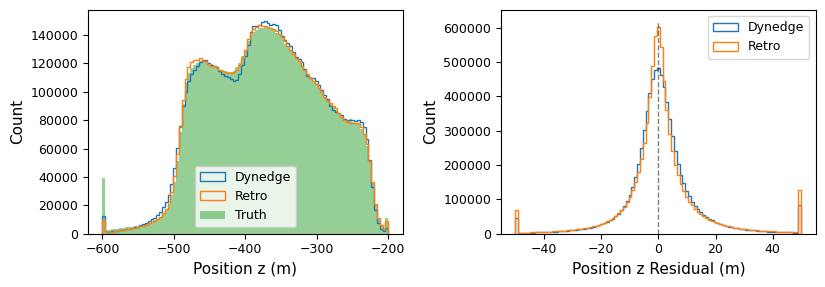

In [ ]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-600,-200,102)
hist = axs[0].hist(np.clip(position['position_z_pred'],-600,-200),bins=bins_position,label='Dynedge',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(retro['position_z_retro'],-600,-200),bins=bins_position,label='Retro',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(position['position_z'],-600,-200),bins=bins_position,label='Truth',alpha=0.5,histtype='stepfilled')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position z (m)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=130*10**3)
axs[0].legend()

bins_position_res = np.linspace(-50,50,102)
axs[1].hist(np.clip(position['position_z_residual'],-50,50),bins=bins_position_res,label='Dynedge',histtype='step')
axs[1].hist(np.clip(retro['position_z_retro_residual'],-50,50),bins=bins_position_res,label='Retro',histtype='step')
axs[1].set_ylabel(r'Count')
axs[1].set_xlabel(r'Position z Residual (m)')
axs[1].vlines(0,0,620000,linestyle='--',color='k',alpha=0.5,linewidth=1)
#axs[1].set_yscale('log')
axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'position_z_result_MC_vs_retro_not_log.png', format='png', bbox_inches='tight')